# Introduction à la simulation en mécanique

In [1]:
import numpy as np
import matplotlib.pyplot as plt

![Image d'un boulet](boulet.png "Trajectoire d'un boulet de canon")

Représentation des différentes phases d'un mouvement (violent, mixte et naturel) selon Aristote dans un diagrame de Luis Collado’s ‘Platica Manual de Artilleria’ publié en 1592 (https://arxiv.org/pdf/1804.00716)

## Simulation d'une trajectoire simple

Text(0.5, 1.0, "Trajectoire d'une balle")

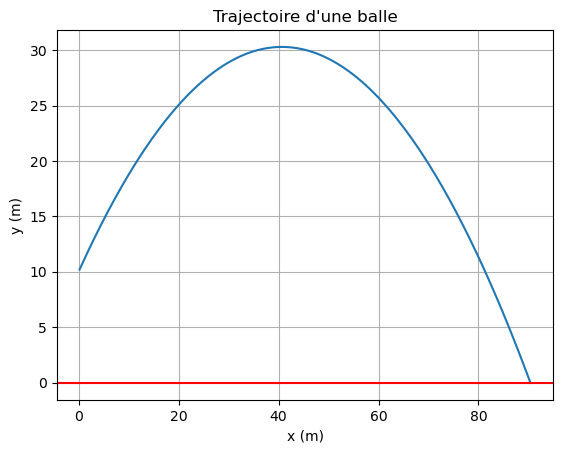

In [38]:
# données d'entrée #
# positions, vitesse et acceleration selon x et y

x = 0 # m
y = 10 # m

vx = 20 # m/s
vy = 20 # m/s

ax = 0 # m/s²
ay = -9.81 # m/s²

# boucle de calcul
dt = 0.01 # s, pas de temps

x_list = list()
y_list = list()

for i in range(10000):

    # on met à jour la vitesse en intégrant sur une toute petite durée dt
    # on fait l'hytpothèse que l'accélération reste constante sur cette durée
    vx += ax * dt
    vy += ay * dt

    # on met à jour la position en intégrant la vitesse sur une toute petite durée dt
    x += vx * dt
    y += vy * dt

    x_list.append(x)
    y_list.append(y)

    # dès que la balle atteint le sol, on arrête la simulation
    if y <= 0: break

# on dessine la trajectoire
plt.plot(x_list, y_list)
plt.grid()
plt.axhline(0, c='red')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title("Trajectoire d'une balle")




## Simulation d'une trajectoire avec frottement de l'air

Ici on va avoir besoin de définir l'aire $A$ de l'objet, sa masse $m$, ainsi que la densité de l'air $\rho$.

La force de frottement de l'air s'écrit:

$F = \frac{1}{2} \rho A v^2$

Ai niveau du sol, sur la Terre, à une température de 25° et une pression de 1 atm, la densité est $\rho = 1$ kg/m³

Text(0.5, 1.0, "Trajectoire d'une balle avec et sans frottement")

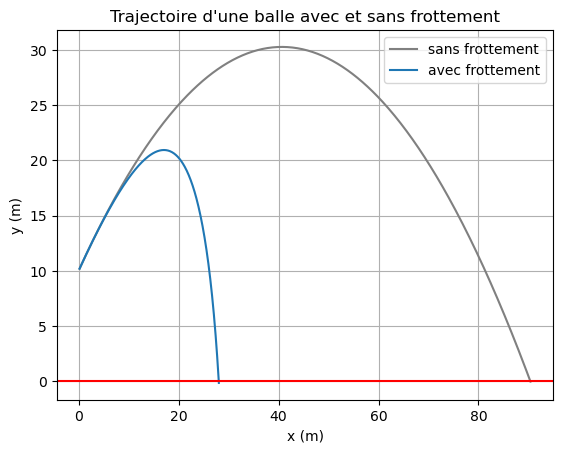

In [39]:
# données d'entrée #
# positions, vitesse et acceleration selon x et y

x = 0 # m
y = 10 # m

vx = 20 # m/s
vy = 20 # m/s

ax = 0 # m/s²
ay = -9.81 # m/s²

m = 1 # kg
A = 0.1 # Aire en m²
rho = 1 # kg/m³

# boucle de calcul
dt = 0.01 # s, pas de temps

x_list_frottement = list()
y_list_frottement = list()

for i in range(10000):

    # on peut calculer la force de frottement en fonction de la vitesse
    Fx = 0.5 * rho * A * vx**2
    Fy = 0.5 * rho * A * vy**2

    # Cette fois-ci l'accélération change
    ax = -np.sign(vx) * Fx/m
    ay = -9.81 - np.sign(vx) * Fy/m # multiplier par -np.sign(vx) permet de retourner la force de frottement calculée dans le sens inverse de la vitesse
    
    # on met à jour la vitesse en intégrant sur une toute petite durée dt
    # on fait l'hytpothèse que l'accélération reste constante sur cette durée
    vx += ax * dt
    vy += ay * dt

    # on met à jour la position en intégrant la vitesse sur une toute petite durée dt
    x += vx * dt
    y += vy * dt

    x_list_frottement.append(x)
    y_list_frottement.append(y)

    # dès que la balle atteint le sol, on arrête la simulation
    if y <= 0: break

# on dessine la trajectoire
plt.plot(x_list, y_list, color='gray', label='sans frottement')
plt.plot(x_list_frottement, y_list_frottement, label='avec frottement')
plt.grid()
plt.axhline(0, c='red')
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title("Trajectoire d'une balle avec et sans frottement")

